In [ ]:
import zipfile
import os

zip_path = "/content/sign_dataset.zip"
extract_path = "/content/sign_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted to:", extract_path)


✅ Dataset extracted to: /content/sign_dataset


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

# ---------------- Parameters ----------------
DATA_DIR = "/content/sign_dataset/sign_dataset"  # extracted folder path
IMG_SIZE = 128  # resize images to 128x128
WORDS = ["hello", "bye", "thankyou", "congratulations"]

X, y = [], []

# ---------------- Load Images ----------------
for label in WORDS:
    folder = os.path.join(DATA_DIR, label)
    for file in os.listdir(folder):
        if file.endswith((".png", ".jpg", ".jpeg")):
            path = os.path.join(folder, file)
            img = load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
            img_array = img_to_array(img) / 255.0  # normalize
            X.append(img_array)
            y.append(label)

X = np.array(X)
y = np.array(y)

print("✅ Dataset shape:", X.shape, y.shape)

# ---------------- Encode Labels ----------------
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_encoded = tf.keras.utils.to_categorical(y_encoded)

# Save label mapping for Streamlit or later use
label_map = dict(zip(encoder.classes_, range(len(encoder.classes_))))
pd.DataFrame(list(label_map.items()), columns=["Word", "ClassID"]).to_csv("labels.csv", index=False)
print("✅ Label mapping saved to labels.csv")

# ---------------- Train-Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ---------------- Build CNN Model ----------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(WORDS), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



✅ Dataset shape: (415, 128, 128, 3) (415,)
✅ Label mapping saved to labels.csv


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ---------------- Train Model ----------------
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 443ms/step - accuracy: 0.5531 - loss: 0.9599 - val_accuracy: 1.0000 - val_loss: 1.3610e-04
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 1.3227e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9956 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 2.4765e-06 - val_accuracy: 1.0000 - val_loss: 1.1061e-05
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 2.0686e-07
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 1.0584e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000

In [ ]:

# ---------------- Evaluate ----------------
loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {acc*100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 399ms/step - accuracy: 1.0000 - loss: 0.0000e+00
✅ Test Accuracy: 100.00%


In [ ]:
# ---------------- Save Model ----------------
model.save("model.h5")
print("🎉 Model saved as model.h5")



🎉 Model saved as model.h5


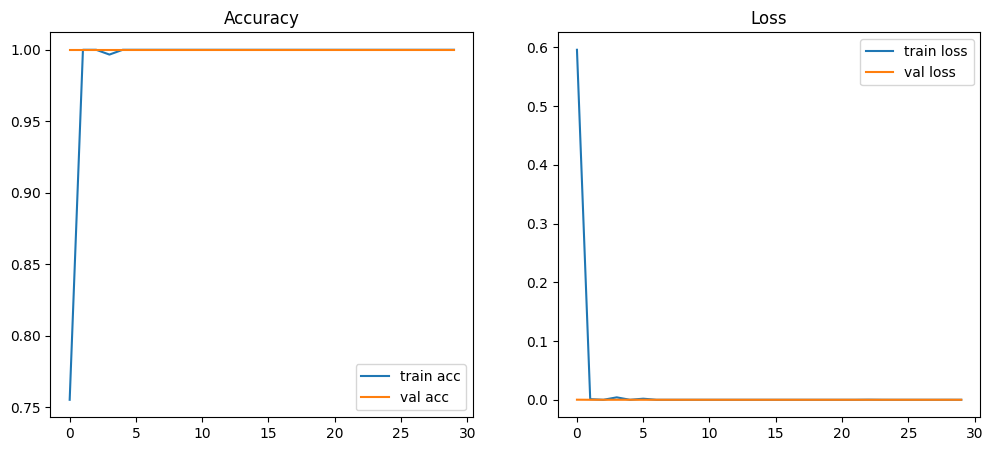

In [ ]:
# ---------------- Plot Accuracy & Loss ----------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.show()


In [ ]:
IMG_SIZE = 128
MODEL_PATH = "model.h5"
LABELS_PATH = "labels.csv"

# ---------------- Load Model & Labels ----------------
model = tf.keras.models.load_model(MODEL_PATH)
labels_df = pd.read_csv(LABELS_PATH)
labels = labels_df.sort_values("ClassID")["Word"].tolist()  # make list in
image_path = "/content/sign_dataset/sign_dataset/thankyou/19.png"  # change to your test image
img = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# ---------------- Predict ----------------
pred_probs = model.predict(img_array)
pred_class = np.argmax(pred_probs, axis=1)[0]
pred_label = labels[pred_class]

print(f"✅ Predicted Label: {pred_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
✅ Predicted Label: thankyou
